In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

In [2]:
df = pd.read_csv('./Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.shape


(14640, 15)

In [4]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [5]:
df.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
airline_sentiment_gold             40
name                            14640
negativereason_gold                32
retweet_count                   14640
text                            14640
tweet_coord                      1019
tweet_created                   14640
tweet_location                   9907
user_timezone                    9820
dtype: int64

In [6]:
len(df)

14640

In [7]:
((len(df)-df.count())/len(df))*100


tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [8]:
del df['airline_sentiment_gold']
del df['negativereason_gold']
del df['tweet_coord']

In [9]:
df.shape

(14640, 12)

In [10]:
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
df.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
name                            14640
retweet_count                   14640
text                            14640
tweet_created                   14640
tweet_location                   9907
user_timezone                    9820
dtype: int64

In [12]:
len(df)

14640

In [13]:
((len(df)-df.count())/len(df))*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
name                             0.000000
retweet_count                    0.000000
text                             0.000000
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [14]:
sentiment_count = df.airline_sentiment.value_counts()
airline_total = df['airline'].value_counts()

In [15]:
sentiment_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [16]:
airline_total

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Text(0.5, 1.0, 'Airline Review Count')

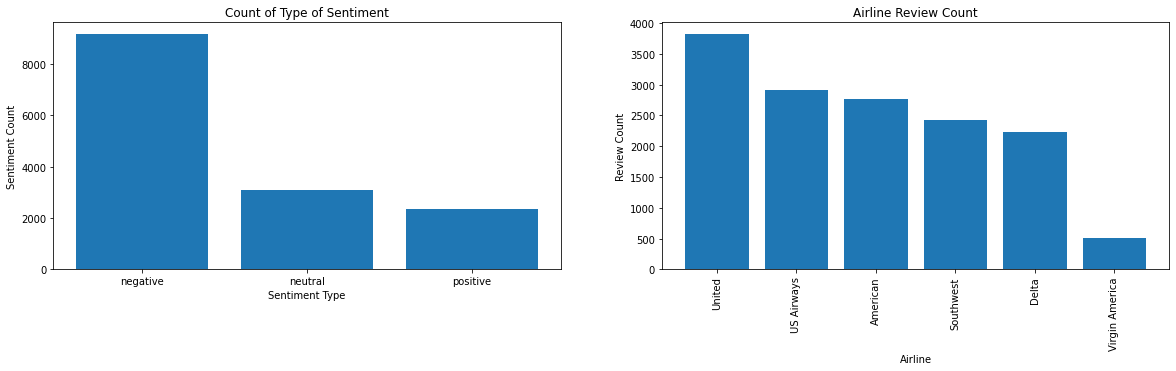

In [17]:
index = [1,2,3]
plt.figure(1,figsize=(20,10))
plt.subplot(221)
plt.bar(index,sentiment_count)
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')
Index=[1,2,3,4,5,6]
plt.subplot(222)
plt.bar(Index,airline_total)
plt.xticks(Index,['United','US Airways','American','Southwest','Delta','Virgin America'],rotation=90)
plt.xlabel('Airline')
plt.ylabel('Review Count')
plt.title('Airline Review Count')

In [18]:
df.groupby('airline')['airline_sentiment'].first()

airline
American          negative
Delta             positive
Southwest         negative
US Airways        negative
United            positive
Virgin America     neutral
Name: airline_sentiment, dtype: object

In [19]:
airline_count = df.groupby('airline')['airline_sentiment'].value_counts()


In [20]:
airline_count

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

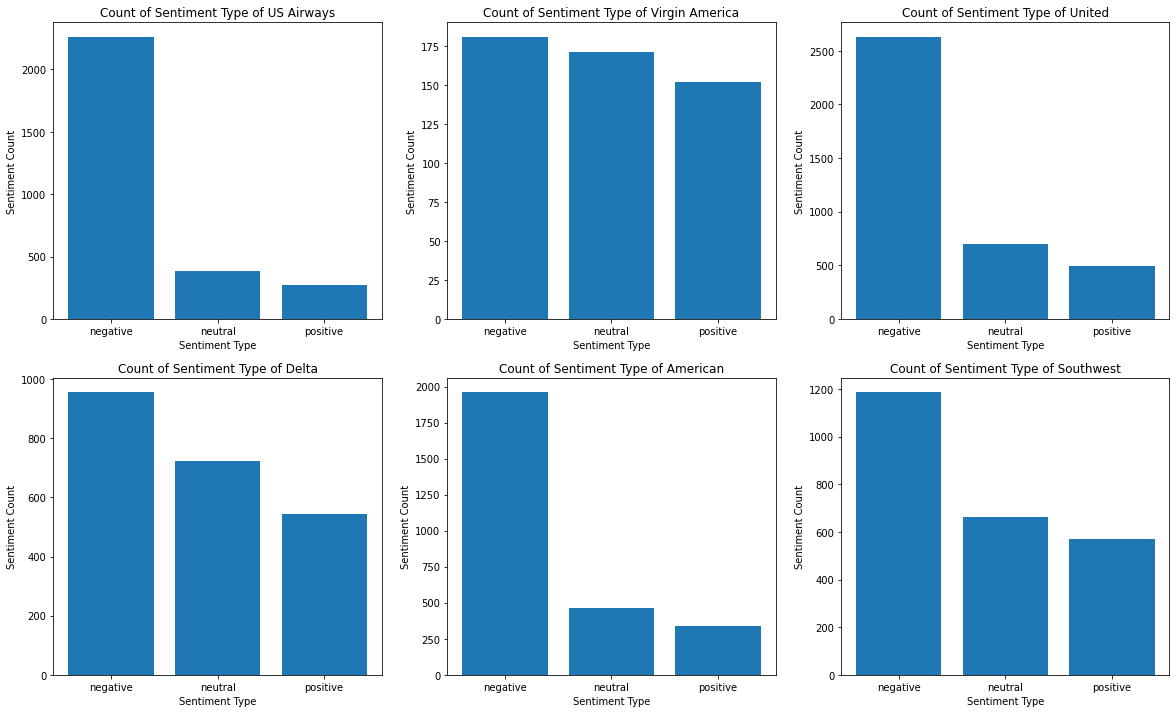

In [41]:
def plot_sentiment_airline(airline):
    df_airline = df[df['airline']==airline]
    count = df_airline['airline_sentiment'].value_counts()
    index = [1,2,3]
    plt.bar(index,count)
    plt.xticks(index,['negative','neutral','positive'],rotation=0)
    plt.xlabel('Sentiment Type')
    plt.ylabel('Sentiment Count')
    plt.title('Count of Sentiment Type of '+airline)
airlines = ['US Airways','Virgin America','United','Delta','American','Southwest']
for i in range(len(airlines)):
    plt.figure(1,figsize=(20,12))
    temp = 231+i
    plt.subplot(temp)
    plot_sentiment_airline(airlines[i])


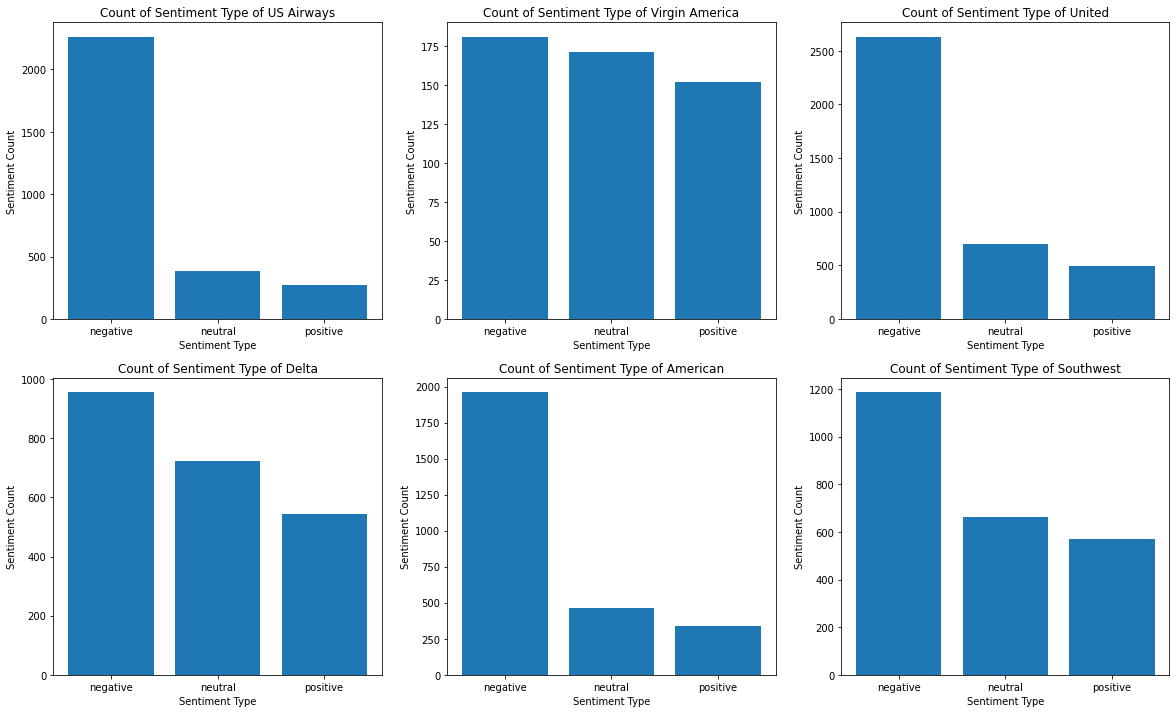

In [42]:
def plot_sentiment_airline(airline):
    df_airline = df[df['airline']==airline]
    count = df_airline['airline_sentiment'].value_counts()
    index = [1,2,3]
    plt.bar(index,count)
    plt.xticks(index,['negative','neutral','positive'],rotation=0)
    plt.xlabel('Sentiment Type')
    plt.ylabel('Sentiment Count')
    plt.title('Count of Sentiment Type of '+airline)
airlines = ['US Airways','Virgin America','United','Delta','American','Southwest']
for i in range(len(airlines)):
    plt.figure(1,figsize=(20,12))
    temp = 231+ i
    plt.subplot(temp)
    plot_sentiment_airline(airlines[i])


In [43]:
timezone_count = df['user_timezone'].value_counts()
tweet = df.groupby(['airline','airline_sentiment'])['user_timezone'].value_counts()

In [44]:
timezone_count

Eastern Time (US & Canada)    3744
Central Time (US & Canada)    1931
Pacific Time (US & Canada)    1208
Quito                          738
Atlantic Time (Canada)         497
                              ... 
Monterrey                        1
Bern                             1
Kuala Lumpur                     1
Newfoundland                     1
Lisbon                           1
Name: user_timezone, Length: 85, dtype: int64

In [45]:
tweet

airline         airline_sentiment  user_timezone             
American        negative           Eastern Time (US & Canada)    383
                                   Central Time (US & Canada)    321
                                   Pacific Time (US & Canada)    152
                                   Quito                         118
                                   Atlantic Time (Canada)         46
                                                                ... 
Virgin America  positive           America/New_York                2
                                   Tijuana                         2
                                   Alaska                          1
                                   Kuala Lumpur                    1
                                   Quito                           1
Name: user_timezone, Length: 436, dtype: int64

In [48]:
df['tweet_created']=pd.to_datetime(df['tweet_created'])
df['tweet_created'] = df['tweet_created'].dt.date
day = df.groupby(['tweet_created','airline'])['airline_sentiment'].value_counts(sort=True)

In [49]:
day

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  positive              13
                               negative              10
                               neutral                6
Name: airline_sentiment, Length: 136, dtype: int64

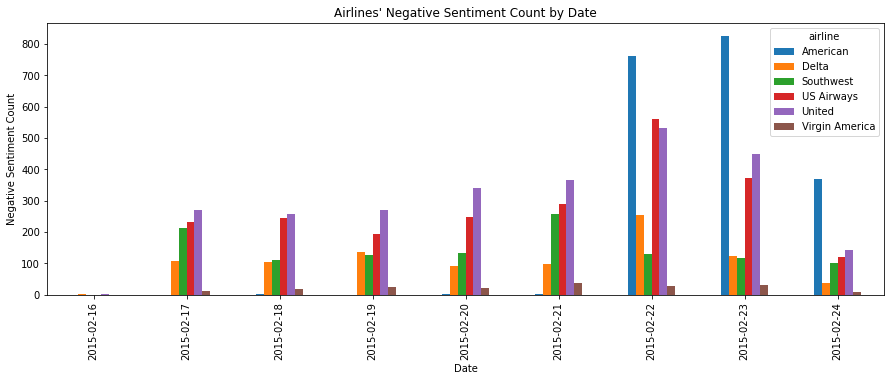

In [50]:
date = day.loc(axis=0)[:,:,'negative']
date.groupby(['tweet_created','airline']).sum().unstack().plot(kind='bar',figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Negative Sentiment Count')
plt.title("Airlines' Negative Sentiment Count by Date")
plt.show()

In [51]:
df['negativereason'].nunique()

10

In [52]:
nr_count = df['negativereason'].value_counts()
nr_dict = dict(df['negativereason'].value_counts())


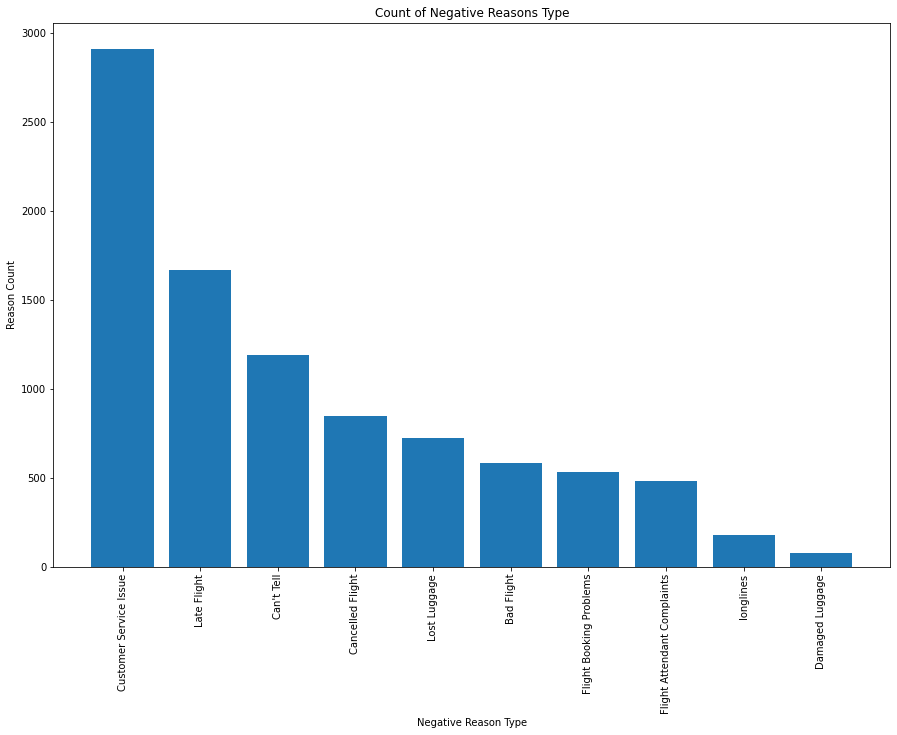

In [54]:
nr = ["Customer Service Issue","Late Flight","Can't Tell", "Cancelled Flight", "Lost Luggage", "Bad Flight","Flight Booking Problems",         
"Flight Attendant Complaints","longlines","Damaged Luggage"]

def plot_negativereason_count(reason,reason_count):
    index=list(range(10))
    plt.figure(figsize=(15,10))
    plt.bar(index,reason_count)
    plt.xticks(index,reason,rotation=90)
    plt.xlabel('Negative Reason Type')
    plt.ylabel('Reason Count')
    plt.title('Count of Negative Reasons Type')
plot_negativereason_count(nr,nr_count)

In [55]:
negative_df = df.groupby('airline')['negativereason'].value_counts(ascending=False)

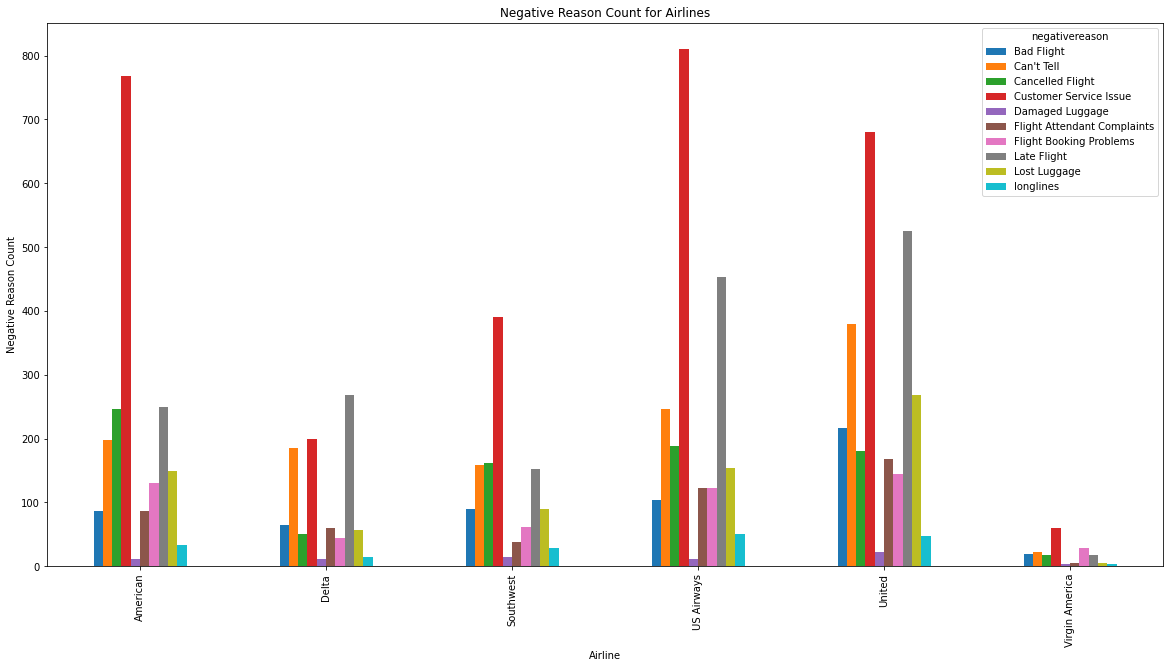

In [56]:
negative_df.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(20,10))
plt.xlabel('Airline')
plt.ylabel('Negative Reason Count')
plt.title("Negative Reason Count for Airlines")
plt.show()


In [57]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [59]:
def text_to_words(tweet):
    letters = re.sub("^a-zA-Z"," ",tweet)
    words = letters.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join(meaningful_words))

In [61]:
df['airline_sentiment']

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [62]:
df['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [63]:
df['sentiment'] = df['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
df['text_clean'] = df['text'].apply(lambda x:text_to_words(x))

In [64]:
df['sentiment']

0        1
1        1
2        1
3        0
4        0
        ..
14635    1
14636    0
14637    1
14638    0
14639    1
Name: sentiment, Length: 14640, dtype: int64

In [65]:
df['text_clean']

0                           @virginamerica @dhepburn said.
1        @virginamerica plus added commercials experien...
2        @virginamerica today... must mean need take an...
3        @virginamerica really aggressive blast obnoxio...
4                      @virginamerica really big bad thing
                               ...                        
14635     @americanair thank got different flight chicago.
14636    @americanair leaving 20 minutes late flight. w...
14637    @americanair please bring american airlines #b...
14638    @americanair money, change flight, answer phon...
14639    @americanair 8 ppl need 2 know many seats next...
Name: text_clean, Length: 14640, dtype: object

In [66]:
train,test=train_test_split(df,test_size=0.2,random_state=42)

In [67]:
def clean_tweet(tweet_text):
    res = []
    for tweet in tweet_text:
        res.append(tweet)
    return res
train_clean_text = clean_tweet(train['text_clean'])
test_clean_text = clean_tweet(test['text_clean'])

In [68]:
counter_vectorizer = CountVectorizer(analyzer = "word")
train_features= counter_vectorizer.fit_transform(train_clean_text)
test_features=counter_vectorizer.transform(test_clean_text)

In [69]:
Classifiers = [
    SVC(kernel="rbf", C=0.025, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    GradientBoostingClassifier(),GaussianNB()]

Accuracy of SVC is 0.7431693989071039
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      2389
           1       0.40      0.77      0.52       539

    accuracy                           0.74      2928
   macro avg       0.67      0.75      0.67      2928
weighted avg       0.83      0.74      0.77      2928



<Figure size 432x288 with 0 Axes>

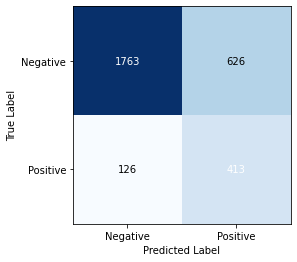

Accuracy of DecisionTreeClassifier is 0.76775956284153
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1859
           1       0.69      0.67      0.68      1069

    accuracy                           0.77      2928
   macro avg       0.75      0.75      0.75      2928
weighted avg       0.77      0.77      0.77      2928



<Figure size 432x288 with 0 Axes>

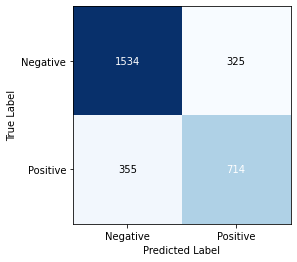

Accuracy of RandomForestClassifier is 0.8220628415300546
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1994
           1       0.70      0.78      0.74       934

    accuracy                           0.82      2928
   macro avg       0.79      0.81      0.80      2928
weighted avg       0.83      0.82      0.82      2928



<Figure size 432x288 with 0 Axes>

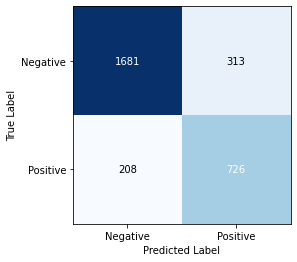

Accuracy of GradientBoostingClassifier is 0.7735655737704918
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2216
           1       0.52      0.76      0.62       712

    accuracy                           0.77      2928
   macro avg       0.72      0.77      0.73      2928
weighted avg       0.82      0.77      0.79      2928



<Figure size 432x288 with 0 Axes>

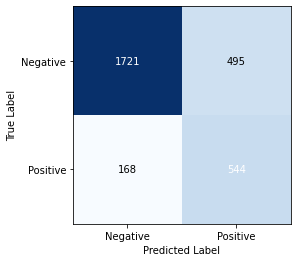

Accuracy of GaussianNB is 0.5850409836065574
              precision    recall  f1-score   support

           0       0.46      0.82      0.59      1062
           1       0.81      0.45      0.58      1866

    accuracy                           0.59      2928
   macro avg       0.64      0.64      0.59      2928
weighted avg       0.68      0.59      0.58      2928



<Figure size 432x288 with 0 Axes>

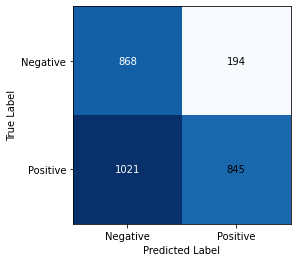

In [70]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['sentiment']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['sentiment'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Negative', 'Positive'],color='black')
    plt.yticks(range(2), ['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Text(0.5, 1.0, 'Classifier Accuracies')

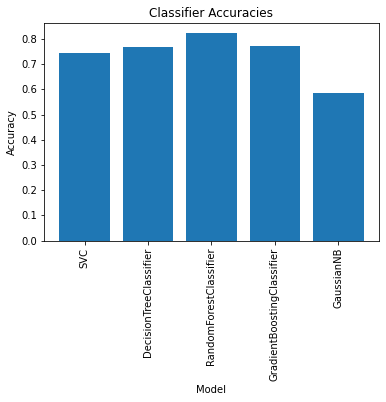

In [71]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy)
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')